<a href="https://colab.research.google.com/github/giuliataurino/YOLO_OpenCV_Face_Blurring_Pipeline/blob/main/globe_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
system("apt install r-cran-tidytext")

In [ ]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(lubridate)
  library(tidytext)
})

In [ ]:
raw <- read.csv("https://khoury.northeastern.edu/home/dasmith/globe/ocr-eval.csv", header=TRUE)

In [ ]:
ocr <- raw %>% mutate(model = case_match(model, "shoumik-pro" ~ "verbose-pro", "textra" ~ "apple", .default = model))

In [ ]:
ocr %>% filter(n > 0 & lbcer < 0.25) %>%
  group_by(model) %>% summarize(uwp=mean(uwp), uwr=mean(uwr), uwf1=mean(uwf1), cer=mean(cer), lbcer=mean(lbcer))

model,uwp,uwr,uwf1,cer,lbcer
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
apple,0.6442264,0.6385875,0.6393954,0.3985489,0.08847984
plain-flash,0.8260935,0.7933945,0.8079007,0.3019943,0.04986416
plain-pro,0.8241063,0.7682199,0.7930118,0.2974421,0.06365205
verbose-pro,0.8123440,0.7674865,0.7872620,0.3021768,0.05707696


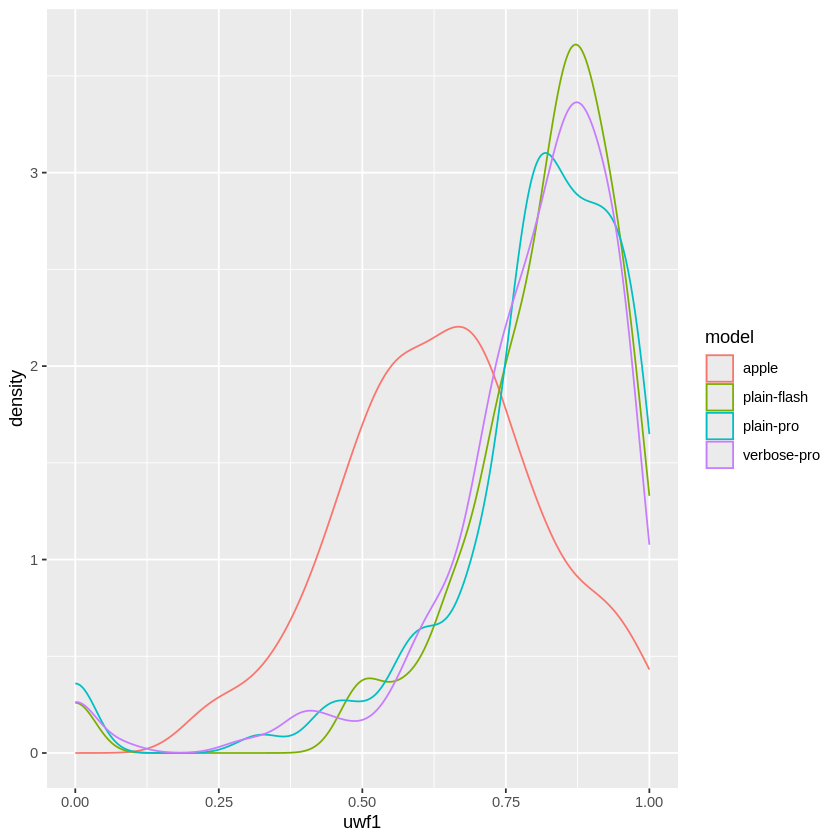

In [ ]:
ocr %>% filter(n > 0 & lbcer < 0.25) %>%
  ggplot(aes(uwf1, color=model)) + geom_density()

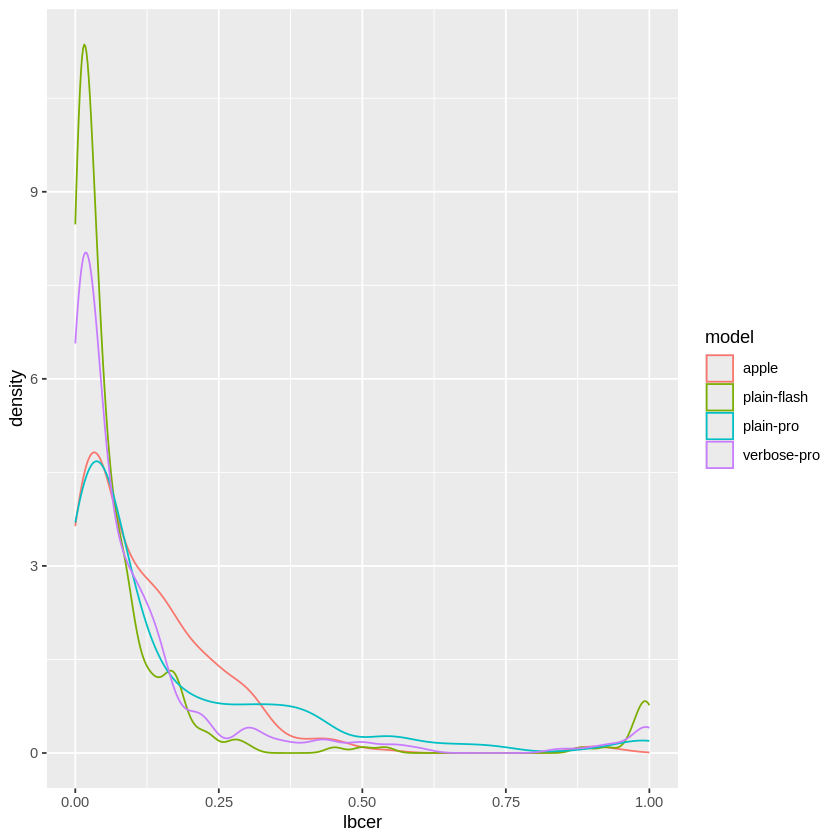

In [ ]:
ocr %>% ggplot(aes(lbcer, color=model)) + geom_density()

Warning message:
“Removed 9 rows containing non-finite outside the scale range
(`stat_density()`).”


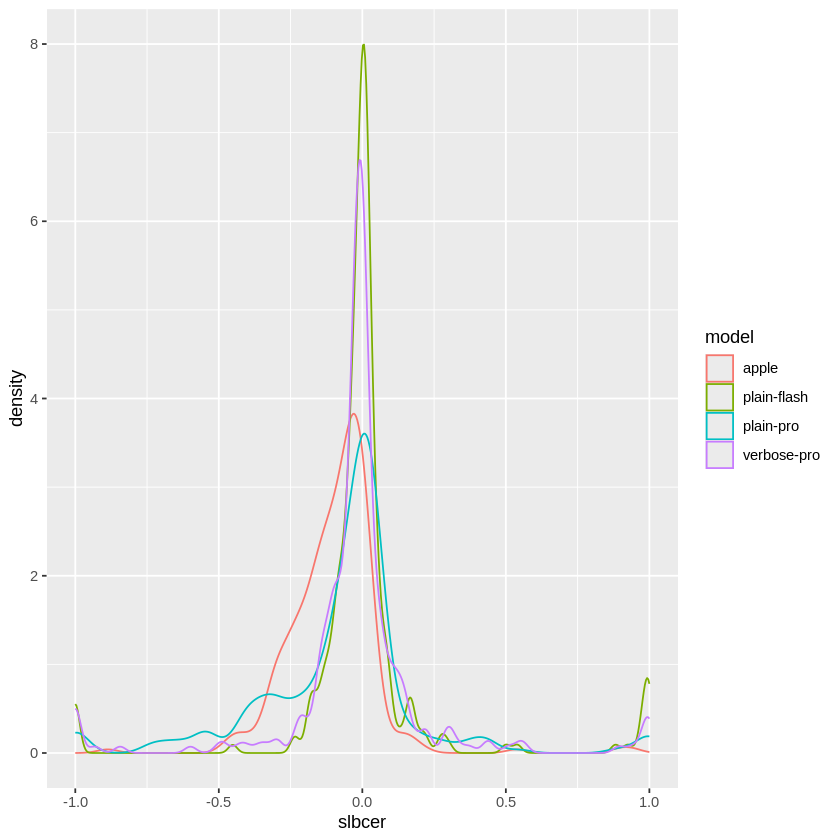

In [ ]:
ocr %>% mutate(maxlen = pmax(n2, n), slbcer = (n2 - n)/pmax(n2, n)) %>%
  ggplot(aes(slbcer, color=model)) + geom_density()

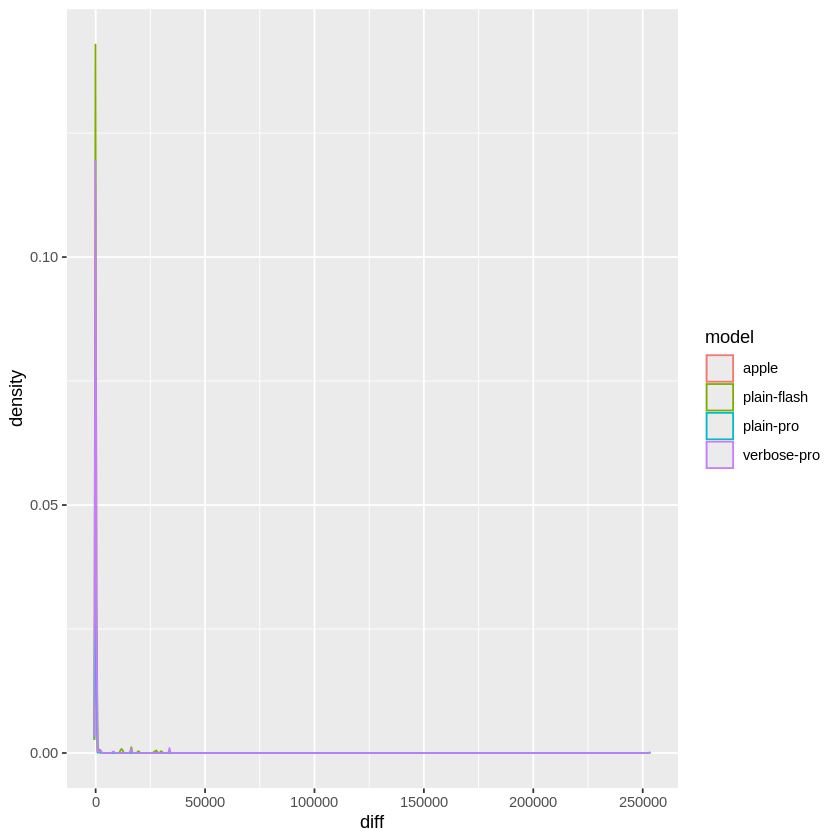

In [ ]:
ocr %>% mutate(diff=n2-n) %>% ggplot(aes(diff, color=model)) + geom_density()

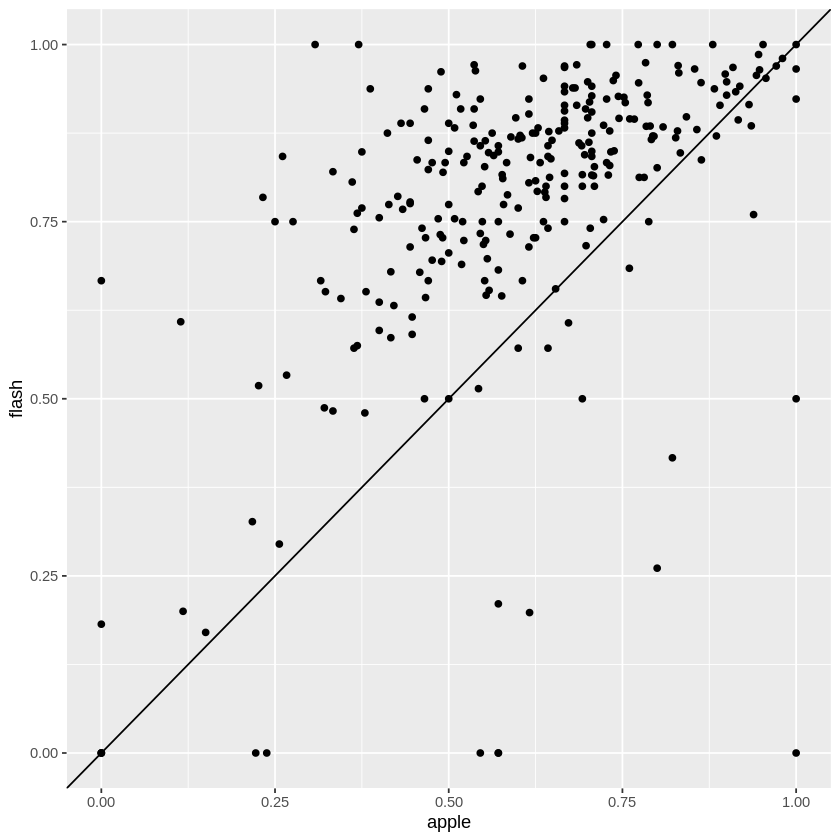

In [ ]:
ocr %>% filter(model == "apple") %>% transmute(base, apple=uwf1) %>%
  inner_join(raw %>% filter(model == "plain-flash") %>% transmute(base, flash=uwf1), by=c("base")) %>%
  ggplot(aes(apple, flash)) + geom_point() + geom_abline(slope=1)

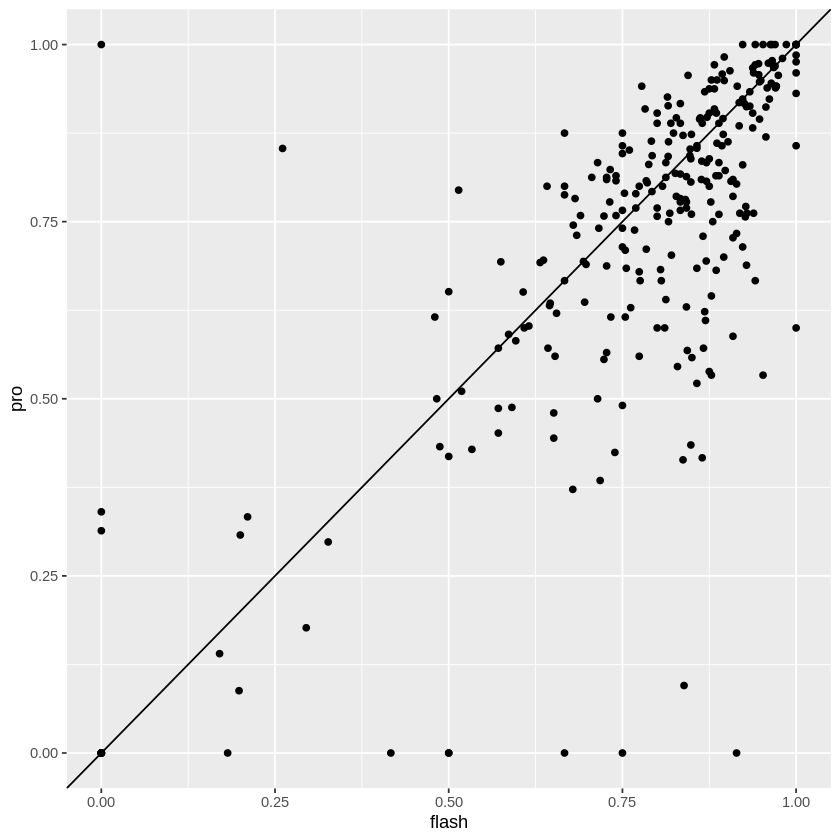

In [ ]:
raw %>% filter(model == "plain-flash") %>% transmute(base, flash=uwf1) %>%
  inner_join(raw %>% filter(model == "plain-pro") %>% transmute(base, pro=uwf1), by=c("base")) %>%
  ggplot(aes(flash, pro)) + geom_point() + geom_abline(slope=1)